In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### LOADING BOSTON DATASET

In [62]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)

C:\Users\ps109\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [63]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### TO KNOW THE SHAPE OF DATASET BEFORE ADDING TARGET VARIABLE

In [64]:
df.shape

(506, 13)

In [65]:
df['MEDV']=data.target

### AFTER ADDING TARGET COLUMN, ANALYSING THE SHAPE OF THE COLUMN 

In [66]:
df.shape

(506, 14)

### FINDING THE NULL VALUE

In [67]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### FINDING CORRELATION 
#### (The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.)

<AxesSubplot:>

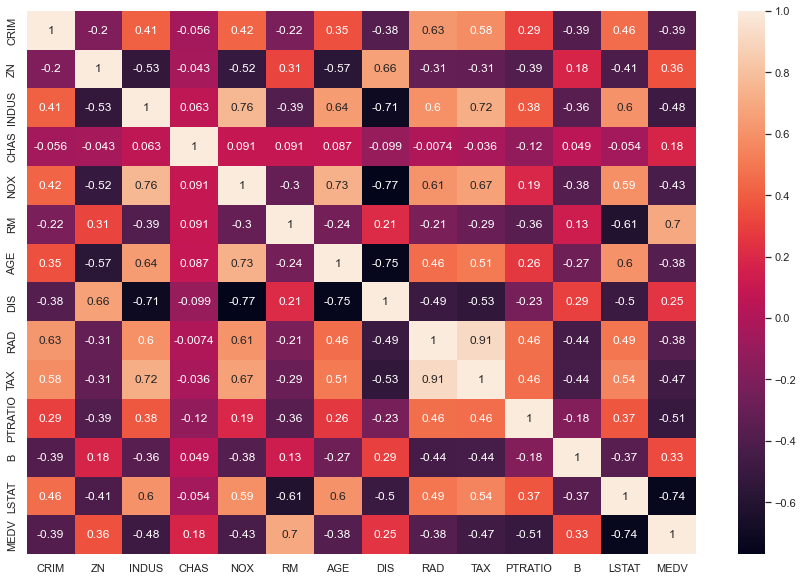

In [22]:
matrix=df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)

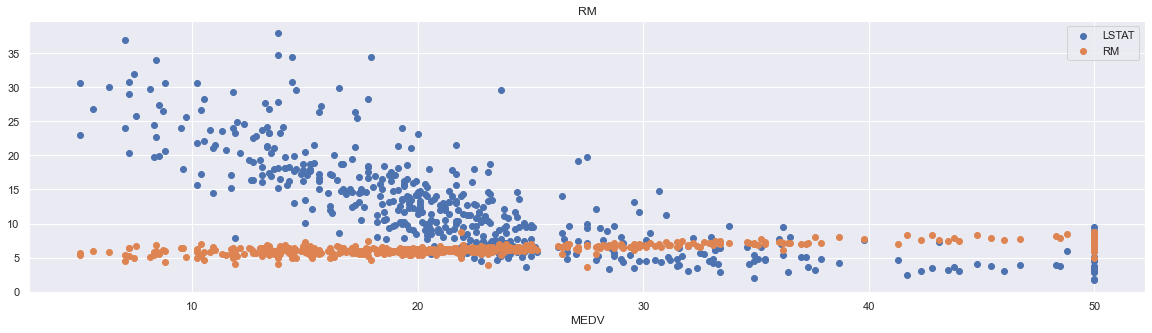

In [113]:
features=['LSTAT','RM']
plt.figure(figsize=(20, 5))
for col in features:
    
    a=df['MEDV']
    b=df[col]
    plt.scatter(a, b, marker='o',label=col)
    plt.title(col)
    
    plt.xlabel('MEDV')
    plt.legend()
    

In [37]:
x1=df[['LSTAT','RM']]
y1=df['MEDV']

#### USING TRAIN_TEST SPLIT MODEL SELECTION (20% of data is for testing and the rest is of training)

In [40]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=10)

# NORMALISATION ( VALUE BETWEEN -1 TO 1)

In [46]:
scaler1=MinMaxScaler()
x1_train_mm=scaler1.fit_transform(x1_train)

In [80]:
x1_test_mm=scaler1.fit_transform(x1_test)

#### USING LINEAR REGRESSION MODEL

In [81]:
lr1=LinearRegression()
lr1.fit(x1_train_mm,y1_train)

LinearRegression()

In [82]:
lr1.coef_

array([-24.6871983 ,  23.12252263])

In [83]:
lr1.intercept_

17.606882341057148

#### NOW PREDICTION

In [84]:
y1_pred_train=lr1.predict(x1_train_mm)

In [85]:
y1_pred_test=lr1.predict(x1_test_mm)

#### R2 SCORE ON TRAINING DATA 

In [90]:
r2_score1_train=r2_score(y1_train,y1_pred_train)
print("R2 SCORE OF THE LINEAR MODEL WITH MIN MAX SCALER PREPROCESSING ON TRAINING DATA IS : ",r2_score1_train)

R2 SCORE OF THE LINEAR MODEL WITH MIN MAX SCALER PREPROCESSING ON TRAINING DATA IS :  0.6363353379616082


#### R2 SCORE ON TESTING DATA

In [91]:
r2_score1_test=r2_score(y1_test,y1_pred_test)
print("R2 SCORE OF THE LINEAR MODEL WITH MIN MAX SCALER PREPROCESSING ON TESTING DATA IS : ",r2_score1_test)

R2 SCORE OF THE LINEAR MODEL WITH MIN MAX SCALER PREPROCESSING ON TESTING DATA IS :  0.5323751384628452


#### MEAN SQUARED ERROR VALUE FOR TRAINING DATASET

In [93]:
mse1_train=mean_squared_error(y1_train,y1_pred_train)
print('THE MEAN SQUARED ERROR VALUE ON TRAINING DATA IS :',mse1_train)

THE MEAN SQUARED ERROR VALUE ON TRAINING DATA IS : 27.98794118547948


#### MEAN SQUARED ERROR VALUE FOR TESTING DATASET

In [94]:
mse1_test=mean_squared_error(y1_test,y1_pred_test)
print('THE MEAN SQUARED ERROR VALUE ON TESTING DATA IS :',mse1_test)

THE MEAN SQUARED ERROR VALUE ON TESTING DATA IS : 48.904555457096954


#### THE MEAN ABSOLUTE ERROR ON TRAINING DATA 

In [97]:
mae1_train=mean_absolute_error(y1_train,y1_pred_train)
print('THE MEAN ABSOLUTE ERROR ON TRAINING DATA IS :', mae1_train)

THE MEAN ABSOLUTE ERROR ON TRAINING DATA IS : 3.798063422689011


#### THE MEAN ABSOLUTE ERROR ON TESTING DATA 


In [98]:
mae1_test=mean_absolute_error(y1_test,y1_pred_test)
print('THE MEAN ABSOLUTE ERROR ON TESTING DATA IS :', mae1_test)

THE MEAN ABSOLUTE ERROR ON TESTING DATA IS : 4.838121254334597


# STANDARIZATION

In [101]:
sts=StandardScaler()
x1_train_sts=sts.fit_transform(x1_train)

In [102]:
x1_test_sts=sts.fit_transform(x1_test)

#### LINEAR MODEL

In [103]:
lr2=LinearRegression()
lr2.fit(x1_train_sts,y1_train)

LinearRegression()

In [104]:
print(lr2.coef_)
print(lr2.intercept_)

[-4.83011601  2.97368897]
21.841831683168316


In [105]:
y2_pred_train=lr2.predict(x1_train_sts)

In [108]:
y2_pred_test=lr2.predict(x1_test_sts)

In [109]:
r2_score_sts_train=r2_score(y2_pred_train,y1_train)
r2_score_sts_test=r2_score(y2_pred_test,y1_test)
print('R2 SCORE ON TRAINING DATA WITH STANDARDIZATION IS :',r2_score_sts_train)
print('R2 SCORE ON TESTING DATA WITH STANDARDIZATION IS :',r2_score_sts_test)

R2 SCORE ON TRAINING DATA WITH STANDARDIZATION IS : 0.4285015457363578
R2 SCORE ON TESTING DATA WITH STANDARDIZATION IS : -0.02727942624285795
